# Machine Learning

**Textbook is available @ [https://www.github.com/a-mhamdi/mlpy](https://www.github.com/a-mhamdi/mlpy)**

---

## Polynomial Regression

Polynomial regression is a type of regression analysis in which the relationship between the independent variables in $X$ and the dependent variable $y$ is modeled as a $p^\text{th}$ degree polynomial. It helps in modeling relationships between variables that are not linear.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.set_printoptions(precision=3)

In [3]:
from matplotlib import pyplot as plt
plt.rc('figure', figsize=(6, 4))

### Importing the dataset

In [4]:
df = pd.read_csv('../Datasets/Position_Salaries.csv')

In [5]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [7]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [8]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [9]:
X = df.iloc[:, 1].values # Level
y = df.iloc[:, -1].values # Salary

In [10]:
print(type(X), X[:5], sep='\n')

<class 'numpy.ndarray'>
[1 2 3 4 5]


In [11]:
print(type(y), y[:5], sep='\n')

<class 'numpy.ndarray'>
[ 45000  50000  60000  80000 110000]


In [12]:
X.shape

(10,)

In [13]:
X = X.reshape(-1, 1)

In [14]:
y.shape

(10,)

### Training the linear regression model on the whole dataset

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_1 = LinearRegression()
lr_1.fit(X, y)

LinearRegression()

### Visualizing the linear regression predictions

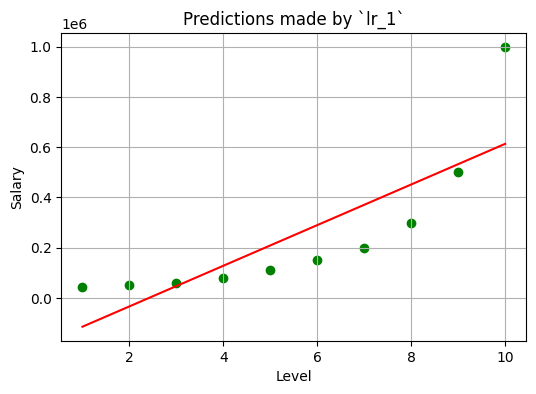

In [17]:
plt.scatter(X, y, color = 'green')
plt.plot(X, lr_1.predict(X.reshape(-1, 1)), color='red')
plt.title('Predictions made by `lr_1`')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.grid()

The **Taylor** series of a real or complex-valued function `f(x)` that is infinitely differentiable at a real or complex number `a` is the power series [[Wikipedia]](https://en.wikipedia.org/wiki/Taylor_series):

$$\displaystyle f(x) \;=\; f(a)+{\frac {f'(a)}{1!}}(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+{\frac {f'''(a)}{3!}}(x-a)^{3}+\cdots \;=\; \sum_{i=0}^{+\infty}\dfrac{f^{(i)}(a)}{i!}~\left(x-a\right)^i$$

In [18]:
Xnew = np.concatenate((X, X**2, X**3, X**4), axis=1)
Xnew

array([[    1,     1,     1,     1],
       [    2,     4,     8,    16],
       [    3,     9,    27,    81],
       [    4,    16,    64,   256],
       [    5,    25,   125,   625],
       [    6,    36,   216,  1296],
       [    7,    49,   343,  2401],
       [    8,    64,   512,  4096],
       [    9,    81,   729,  6561],
       [   10,   100,  1000, 10000]])

In [19]:
lr_2 = LinearRegression()
lr_2.fit(Xnew, y)

LinearRegression()

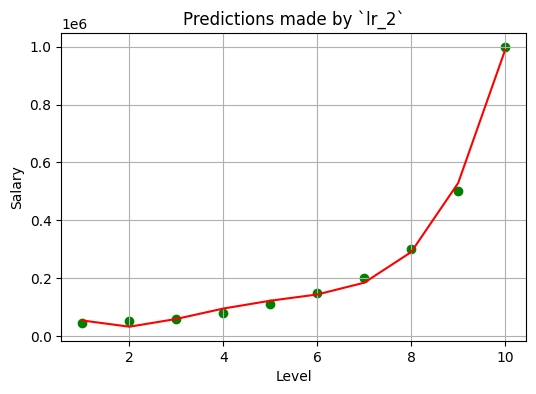

In [20]:
plt.scatter(X, y, color='green')
plt.plot(X, lr_2.predict(Xnew), color='red')
plt.title('Predictions made by `lr_2`')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.grid()

In [21]:
from sklearn.preprocessing import PolynomialFeatures

The goal is to find the polynomial equation that best fits the data. The polynomial equation can be of any degree, but typically the degree is chosen based on the shape of the curve in the data.

In [22]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
print(X_poly[:5])

[[  1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]
 [  1.   4.  16.  64. 256.]
 [  1.   5.  25. 125. 625.]]


In [23]:
lr_3 = LinearRegression()
lr_3.fit(X_poly, y)

LinearRegression()

The code shown above has created a polynomial transformer that transforms the input data into a polynomial representation, and then creates a linear regression model that fits a polynomial to the transformed data. The polynomial degree is specified by the `degree` parameter in the `PolynomialFeatures` transformer.

### Visualizing the polynomial regression predictions

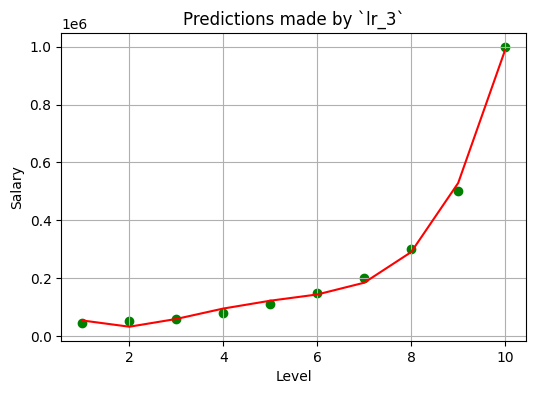

In [24]:
plt.scatter(X, y, color='green')
plt.plot(X, lr_3.predict(poly_reg.fit_transform(X)), color='red')
plt.title('Predictions made by `lr_3`')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.grid()

### Predicting a new result using the linear regressor

In [25]:
lr_1.predict([[6.5]])

array([330378.788])

### Predicting a new result using the polynomial regressor

In [26]:
lr_2.predict(np.array([[6.5, 6.5**2, 6.5**3, 6.5**4]]))

array([158862.453])

In [27]:
lr_3.predict(poly_reg.fit_transform([[6.5]]))

array([158862.453])